In [ ]:
# https://towardsdatascience.com/land-cover-classification-using-tensorflow-in-python-791036eaa373

In [ ]:
# Alternative with pre-trained CNNs !!!
# https://www.thepythoncode.com/article/satellite-image-classification-using-tensorflow-python
# (investigate above !!)

In [30]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow import keras

In [63]:
import random

In [40]:
plt.rcParams.update({'font.size': 8})

In [82]:
# =======================================================
# load unseen testing data

test_data_dir = rf'{os.getcwd()}/data/2750-test' # this does not exist, needs to be generated
test_data_dir = rf'{os.getcwd()}/data/2750'  ### !!!!!!!!!!!!!!!!!!!!!!!!  need to really SPLIT train/test !!!

batch_size = 32
test_dataset = image_dataset_from_directory(
    test_data_dir,
    image_size=(64, 64),
    batch_size=batch_size,
    shuffle=True # was False
)

Found 27000 files belonging to 10 classes.


In [83]:
# =======================================================
# inspect tensorflow testing dataset

# get class names and number of classes
class_names = test_dataset.class_names
num_classes = len(class_names)
print(f'number of classes: {num_classes}', class_names)

number of classes: 10 ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [84]:
# =======================================================
# load trained land cover classification model

# load keras model and print summary
model = keras.models.load_model(f'{os.getcwd()}/land_cover_model')
#model.summary()

In [85]:
len(test_dataset)

844

In [86]:
for dataset in iter(test_dataset):
    image_batch, label_batch = dataset
    print(image_batch.shape)
    y_prob = model.predict(image_batch, verbose=0)
    break

(32, 64, 64, 3)


In [87]:
print(844*32)

27008


In [88]:
batch_size=image_batch.shape[0]

In [89]:
print(f'Batches: {len(test_dataset)}')
print(f'Images/batch: {batch_size}')
print(f'Image: {image_batch.shape[1]}x{image_batch.shape[2]} with {image_batch.shape[3]} colors')

Batches: 844
Images/batch: 32
Image: 64x64 with 3 colors


Class: 03 vs 03   Correct: True   Actual: Highway, Predicted: Highway
Class: 05 vs 02   Correct: False  Actual: Pasture, Predicted: Herbaceous
Class: 02 vs 02   Correct: True   Actual: Herbaceous, Predicted: Herbaceous
Class: 05 vs 05   Correct: True   Actual: Pasture, Predicted: Pasture
Class: 00 vs 00   Correct: True   Actual: AnnualCrop, Predicted: AnnualCrop
Class: 07 vs 07   Correct: True   Actual: Residentia, Predicted: Residentia
Class: 04 vs 04   Correct: True   Actual: Industrial, Predicted: Industrial
Class: 06 vs 06   Correct: True   Actual: PermanentC, Predicted: PermanentC
Class: 04 vs 04   Correct: True   Actual: Industrial, Predicted: Industrial
Class: 02 vs 02   Correct: True   Actual: Herbaceous, Predicted: Herbaceous
Class: 01 vs 01   Correct: True   Actual: Forest, Predicted: Forest
Class: 02 vs 02   Correct: True   Actual: Herbaceous, Predicted: Herbaceous
Class: 00 vs 00   Correct: True   Actual: AnnualCrop, Predicted: AnnualCrop
Class: 05 vs 05   Correct: True   A

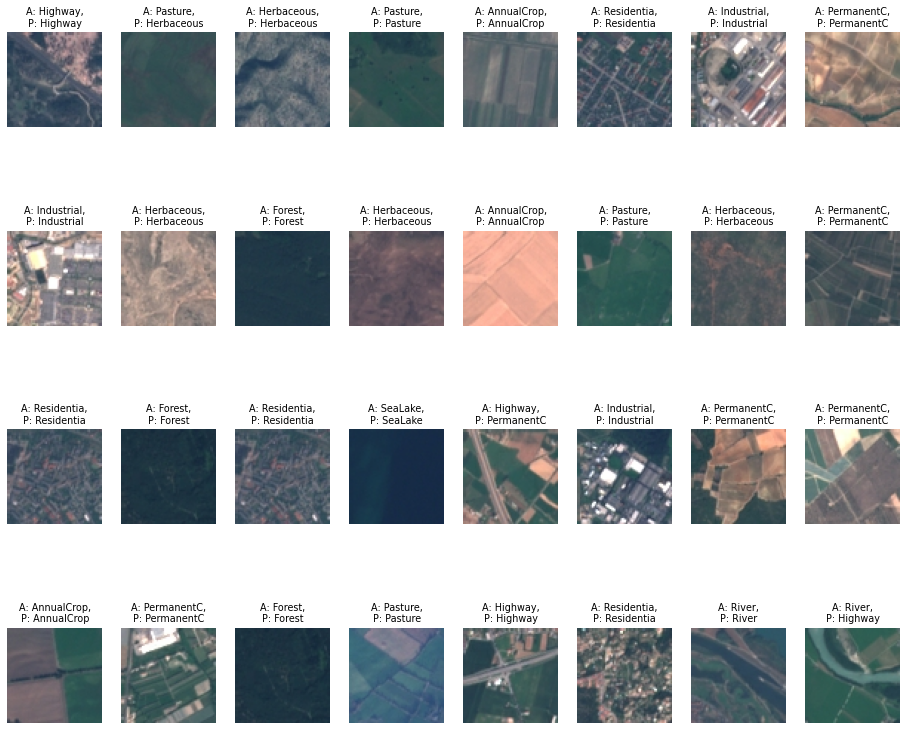

In [102]:
plt.figure(figsize=(16,14))
max_x=4
max_y=8
for ii in range(max_x*max_y):
    # retrieve ith image from current batch and show
    ax = plt.subplot(max_x, max_y, ii + 1)
    
    image_batch, label_batch = next(iter(test_dataset))
    batch_size=image_batch.shape[0]
    i = random.randint(0, batch_size-1)
    image = image_batch[i].numpy().astype("uint8")
    plt.imshow(image)
    plt.axis("off")  # turn off axis for clarity

    y_prob = model.predict(image_batch, verbose=0)
    
    # index of highest probability indicates predicted class
    predicted_class = y_prob[i].argmax()
    actual_class = label_batch[i]
    correct = True if (predicted_class == actual_class) else False 

    # display image title with actual and predicted labels
    plt.title(f'A: {class_names[actual_class][:10]},'
              f'\nP: {class_names[predicted_class][:10]}')
    print(f'Class: {actual_class:02} vs {predicted_class:02}   Correct: {correct!s:^5}  Actual: {class_names[label_batch[i]][:10]}, Predicted: {class_names[predicted_class][:10]}')

# for
plt.show()